In [3]:
#importamos librerias
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#cargamos DB a partir de url en git
download_url = ("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv") 
penguins = pd.read_csv(download_url)
type(penguins)

pandas.core.frame.DataFrame

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.

    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.

    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate, simila

### HISTOGRAMA

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

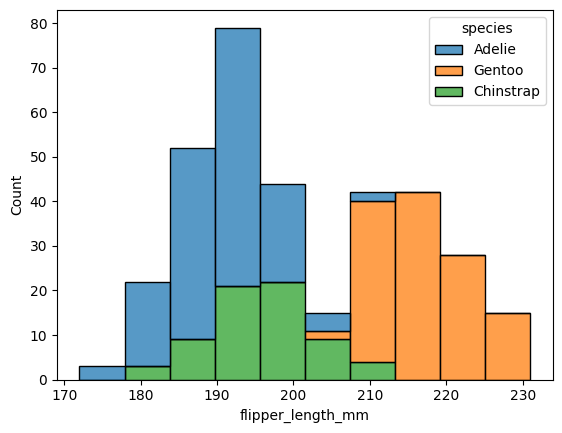

In [11]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack") 

#hue determina la variable que dará el color.
#multiple define que las barras del histograma sean apiladas 
#en lugar de histplot podríamos escribir displot (de gráfico de distribución) y por defecto haría el mismo gráfico

### DENSIDAD DE KERNEL

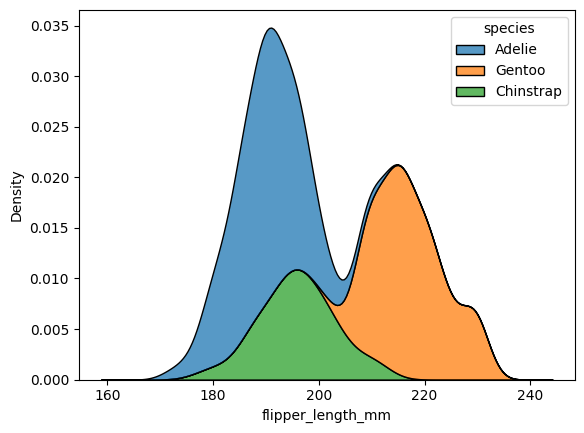

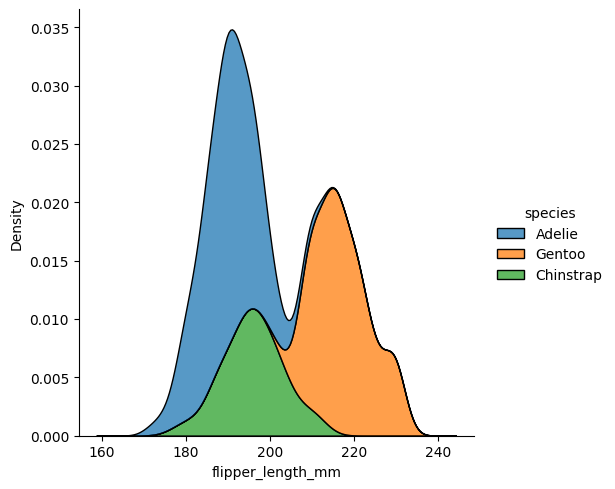

In [15]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#podemos usar diplot(..., kind="kde") para obtener el mismo gráfico
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

#una diferencia es que las leyendas aparecen fuera del gráfico, lo que hace que el gráfico se acorte

The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots. For example, instead of stacking the three distributions for each species of penguins in the same axes, we can “facet” them by plotting each distribution across the columns of the figure:

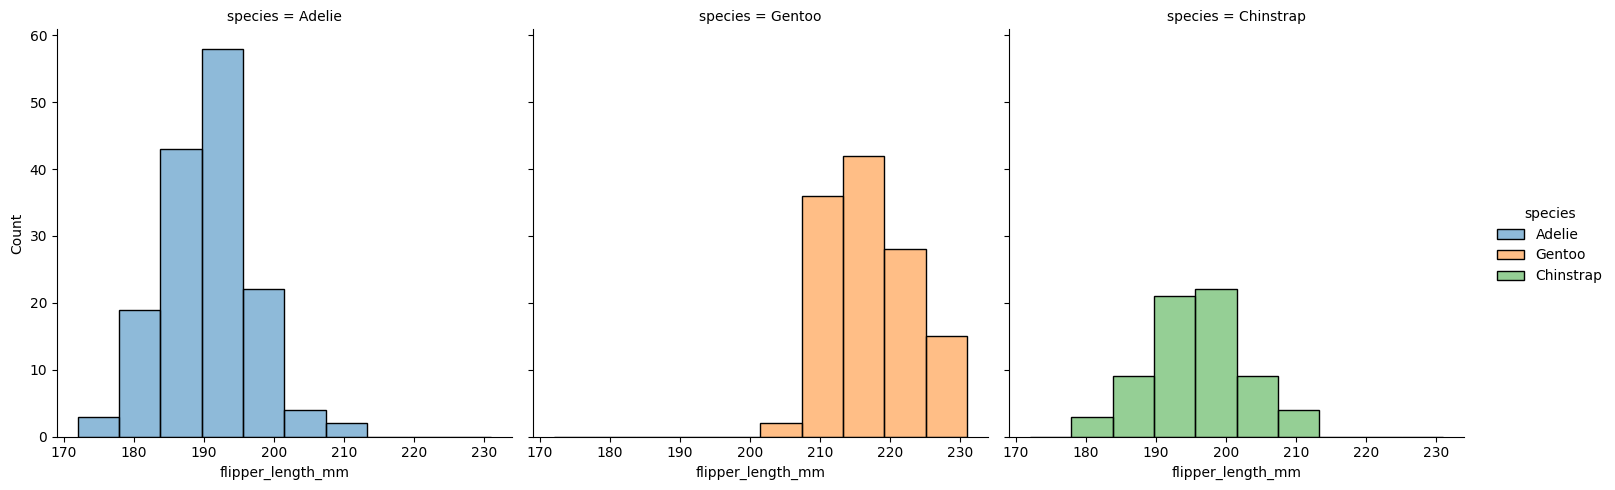

In [16]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

#col="species" indica que se deben crear gráficos separados (columnas) para cada especie de pingüino

### Funciones a nivel de ejes

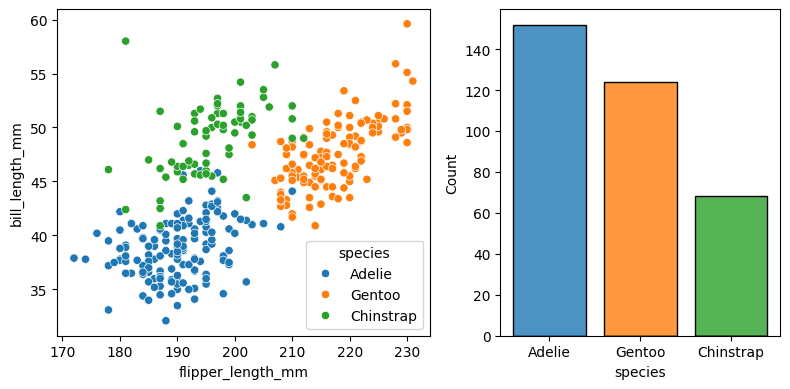

In [20]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3])) #crea lienzo con una fila y dos columnas
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0]) #1er subplot gráfico de dispersión, ax=axs[0]: Dibuja el gráfico en el primer subplot (a la izquierda).
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1]) #2do es subplot es un histograma, ax=axs[1]
f.tight_layout() #Ajusta automáticamente los parámetros para que se ajusten dentro de la figura

### Funciones a nivel figura

Son dueñas de su propia figura. Así que no permiten fácilmente crear un eje compuesto por varios gràficos

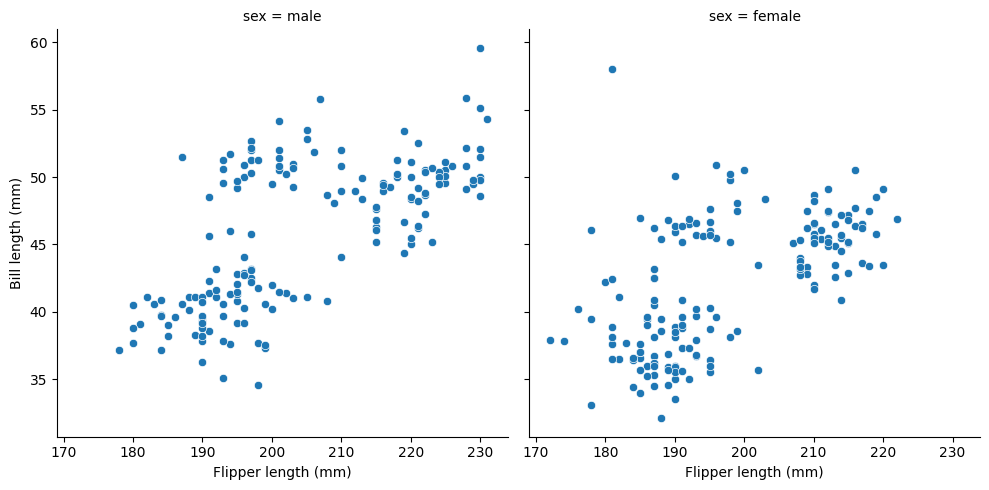

In [24]:
#para diferenciar por columnas según sexo -> col="sex"
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")


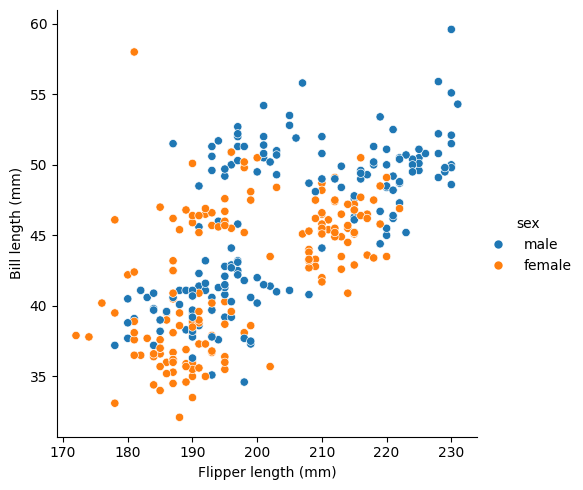

In [25]:
#para diferenciar por colores según sexo -> hue="sex"
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)") #ajustamos las etiquetas a los ejes

### Jointplot()
plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

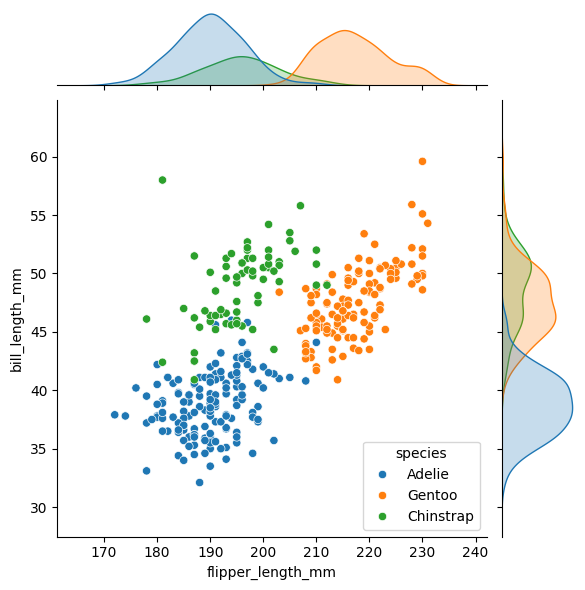

In [26]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

### Pairplot()

it combines joint and marginal views, but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

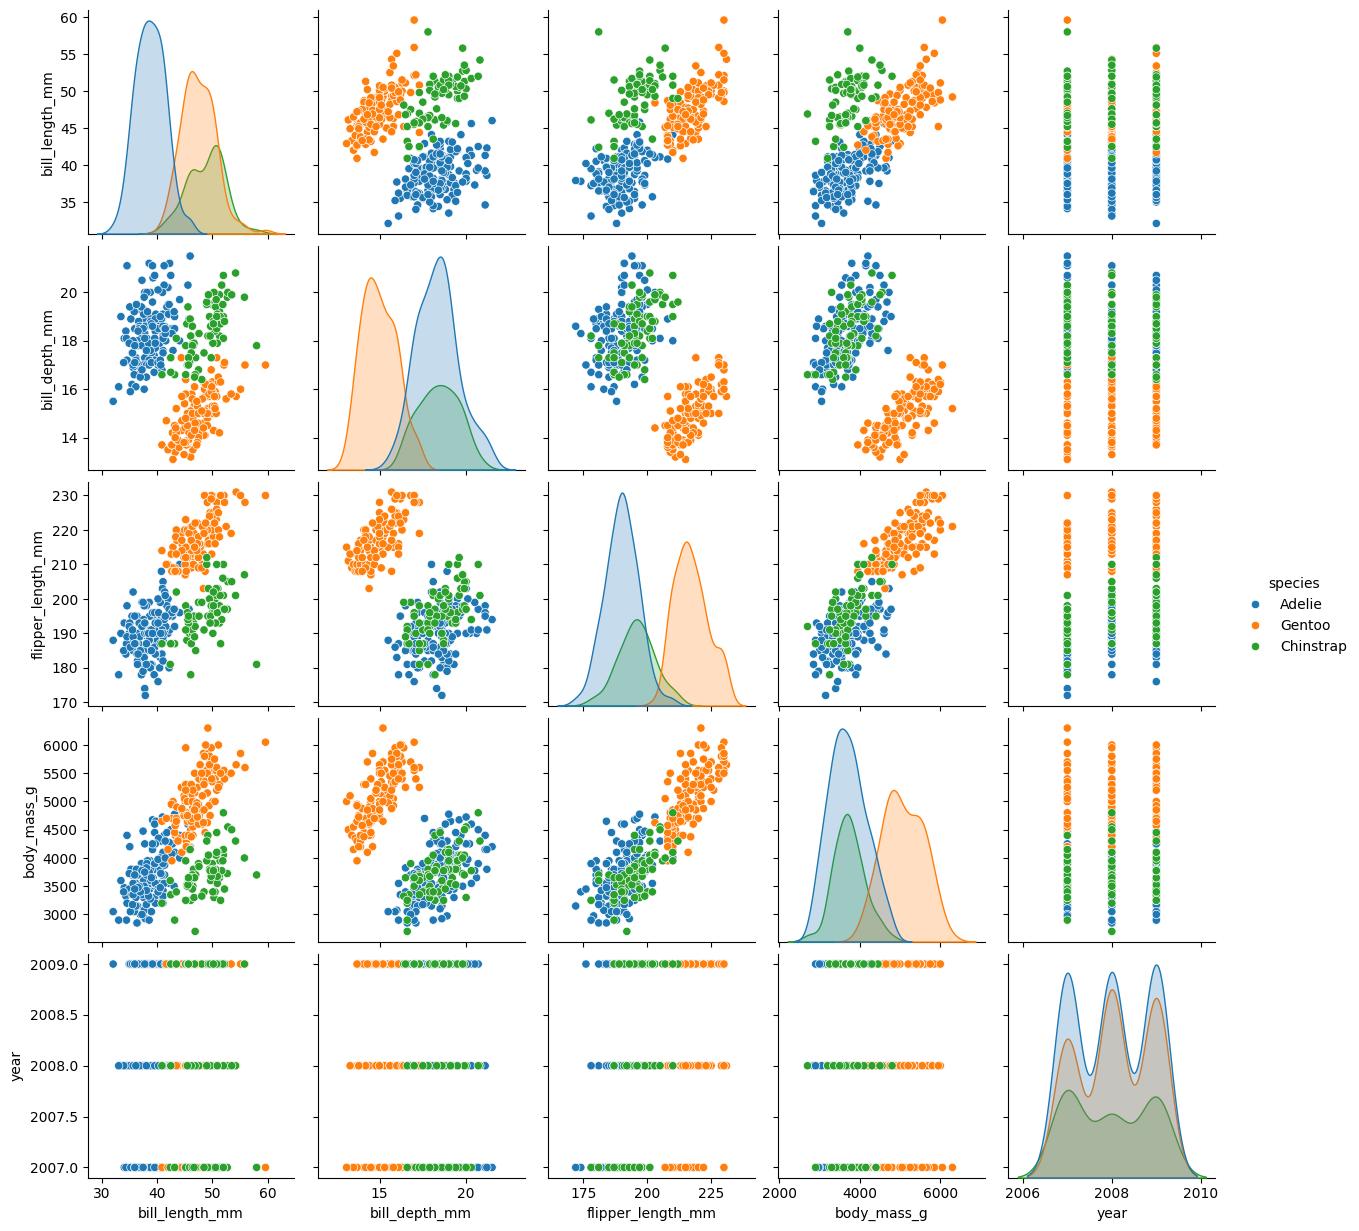

In [27]:
sns.pairplot(data=penguins, hue="species")


### Joinplot tipo histograma

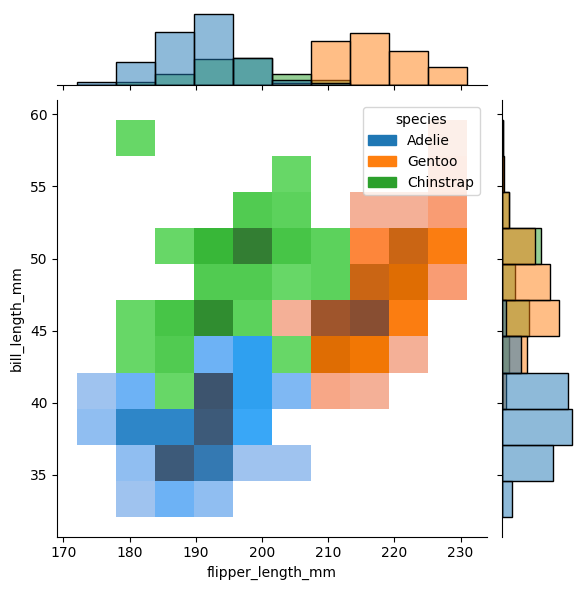

In [28]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")